# Ecuación de Kepler

In [250]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.special import jn
from time import time as timeit
%matplotlib inline
DEG=pi/180
RAD=180/pi

# Definición de la Ecuación

In [251]:
def Ekepler(E,M,e):
    f=E-e*sin(E)-M
    return f

# Solución numérica

In [252]:
e=0.2

# Numeric solution using bisection
M=pi/3
E,properties=bisect(Ekepler,0,2*pi,args=(M,e),xtol=1e-17,full_output=True)
print "M = %.10f"%(M*180/pi)
print "E = %.10f"%(E*180/pi)
print "Solution:\n",properties.__dict__

M = 60.0000000000
E = 70.8232868148
Solution:
{'converged': True, 'function_calls': 53, 'flag': 'converged', 'root': 1.2360995420023746, 'iterations': 51}


In [253]:
# Rutina de solución numérica
def Esol_numeric(M,e,xtol=1E-17):
    E=bisect(Ekepler,0,2*pi,xtol=xtol,args=(M,e))
    return E

# Solución Analítica

In [254]:
def Esol_analytic(M,e):
    """
    Mikkola, 1991
    Code at: http://smallsats.org/2013/04/20/keplers-equation-iterative-and-non-iterative-solver-comparison/
    """
    Ecorr=0;Esgn=1.0
    if M>180*DEG:
        M=360.0*DEG-M
        Ecorr=360*DEG
        Esgn=-1.0
    if e==0:return Ecorr+Esgn*M
        
    a=(1-e)*3/(4*e+0.5);
    b=-M/(4*e+0.5);
    y=(b**2/4 +a**3/27)**0.5;
    x=(-0.5*b+y)**(1./3)-(0.5*b+y)**(1./3);
    w=x-0.078*x**5/(1 + e);
    E=M+e*(3*w-4*w**3);

    #NEWTON CORRECTION 1
    sE=sin(E)
    cE=cos(E)

    f=(E-e*sE-M);
    fd=1-e*cE;
    f2d=e*sE;
    f3d=-e*cE;
    f4d=e*sE;
    E=E-f/fd*(1+\
                  f*f2d/(2*fd*fd)+\
                  f*f*(3*f2d*f2d-fd*f3d)/(6*fd**4)+\
                  (10*fd*f2d*f3d-15*f2d**3-fd**2*f4d)*\
                  f**3/(24*fd**6))

    #NEWTON CORRECTION 2
    f=(E-e*sE-M);
    fd=1-e*cE;
    f2d=e*sE;
    f3d=-e*cE;
    f4d=e*sE;
    E=E-f/fd*(1+\
                  f*f2d/(2*fd*fd)+\
                  f*f*(3*f2d*f2d-fd*f3d)/(6*fd**4)+\
                  (10*fd*f2d*f3d-15*f2d**3-fd**2*f4d)*\
                  f**3/(24*fd**6))
    
    E=Ecorr+Esgn*E
    return E

# Solución por series

In [255]:
def Esol_series_fourier(M,e):
    E=M+(e-1./8*e**3)*sin(M)+0.5*e**2*sin(2*M)+3./8*e**3*sin(3*M)
    return E

def Esol_series_bessel(M,e,N=2):
    E=M
    for n in xrange(1,N+1):
        E+=(2./n)*jn(n,e)*sin(n*M)
    return E

# Comparación de Soluciones

In [256]:
e=0.6
Ms=linspace(0,2*pi,100)

t1=timeit()

# Numeric solution
Ens=array([Esol_numeric(M,e) for M in Ms])
t2=timeit();print "Numeric:",(t2-t1)*1E6;t1=t2

# Analytic solution
Eas=array([Esol_analytic(M,e) for M in Ms])
t2=timeit();print "Analytic:",(t2-t1)*1E6;t1=t2

# Fourier series solution
Efs=array([Esol_series_fourier(M,e) for M in Ms])
t2=timeit();print "Fourier:",(t2-t1)*1E6;t1=t2

# Bessel series solution
Ebs=array([Esol_series_bessel(M,e,N=7) for M in Ms])
t2=timeit();print "Bessel:",(t2-t1)*1E6;t1=t2

Numeric: 6371.02127075
Analytic: 1979.82788086
Fourier: 792.980194092
Bessel: 3226.99546814


# Gráficos comparativos

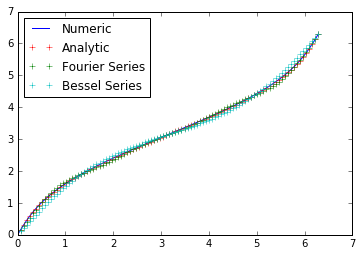

In [257]:
plt.plot(Ms,Ens,'b-',label='Numeric')
plt.plot(Ms,Eas,'r+',label='Analytic')
plt.plot(Ms,Efs,'g+',label='Fourier Series')
plt.plot(Ms,Ebs,'c+',label='Bessel Series')


plt.legend(loc='best')

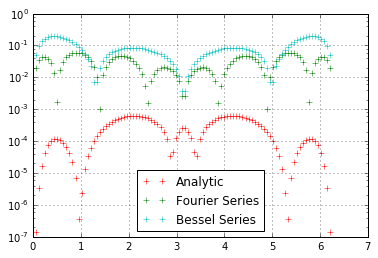

In [258]:
plt.plot(Ms,abs(Eas-Ens),'r+',label='Analytic')
plt.plot(Ms,abs(Efs-Ens),'g+',label='Fourier Series')
plt.plot(Ms,abs(Ebs-Ens),'c+',label='Bessel Series')
plt.yscale("log")
plt.grid()


plt.legend(loc='best')